In [8]:
from scipy import optimize
from scipy import sparse
import numpy as np
from numpy.random import rand

In [3]:
np.info(optimize.fmin)

 fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None,
      full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)

Minimize a function using the downhill simplex algorithm.

This algorithm only uses function values, not derivatives or second
derivatives.

Parameters
----------
func : callable func(x,*args)
    The objective function to be minimized.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to func, i.e., ``f(x,*args)``.
xtol : float, optional
    Absolute error in xopt between iterations that is acceptable for
    convergence.
ftol : number, optional
    Absolute error in func(xopt) between iterations that is acceptable for
    convergence.
maxiter : int, optional
    Maximum number of iterations to perform.
maxfun : number, optional
    Maximum number of function evaluations to make.
full_output : bool, optional
    Set to True if fopt and warnflag outputs are desired.
disp : bool, optional
    Set to Tru

In [18]:
# CSR-матрица
sample_csr = sparse.csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])

# CSС-матрица
sample_csc = sparse.csc_matrix((data, (row, col)), shape=(3, 3))

I = np.array([0,3,1,0])
J = np.array([0,3,1,2])
V = np.array([4,5,7,9])

# COO-матрица
sample_coo = sparse.coo_matrix((V,(I,J)),shape=(4,4))

# LIL матрица
sample_lil = sparse.lil_matrix((3, 3))

# DOK-матрица
sample_dok = sparse.dok_matrix((5, 5), dtype=np.float32)

In [12]:
#sample_lil[0, :100] = np.ones(100)
#sample_lil[1, 100:200] = sample_lil[0, :100]
#sample_lil.setdiag(rand(1000))

for i in range(5):
    for j in range(5):
        sample_dok [i, j] = i + j

In [19]:
# Переведем в dense и исправим необходимые значения
tmp_filled = sample_csr.toarray()
tmp_filled[0, 0] = 10
sample_csr_new = sparse.csr_matrix(tmp_filled)

#Аналогично через сложение двух матриц
tmp_csr = sparse.csr_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csr_new = sample_csr + tmp_csr

In [22]:
# Операции над матрицами
v = np.array([1, 0, -1])
tmp_csr = sparse.csr_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csr = sample_csr + tmp_csr
sample_csr = sample_csr.dot(v)
v = np.array([1, 0, -1])
tmp_csc = sparse.csc_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csc = sample_csc + tmp_csc
sample_csc = sample_csc.dot(v)

sample_lil_tmp = sparse.lil_matrix((3, 3))
sample_lil = sample_lil.dot(v) + sample_lil_tmp

In [23]:
# Создайте матрицу CSR размером , в которой первый столбец заполнен единицами, а третий — четвёрками. 
# Создайте sparse CSR-матрицу с помощью трёх массивов и запишите в переменную tmp. 
# После каждой запятой обязательно добавьте пробел.
tmp = sparse.csr_matrix(([1, 4, 1, 4, 1, 4], ([0, 0, 1, 1, 2, 2], [0, 2, 0, 2, 0, 2])), shape=(3, 4))

Триангуляция Делоне

In [24]:
from scipy.spatial import Delaunay

In [25]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

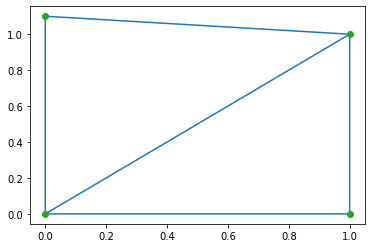

In [26]:
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

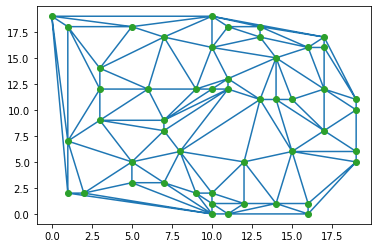

In [35]:
points = np.array([(12, 1), (7, 17), (7, 3), (10, 12), (14, 15), (1, 2), (13, 11), (17, 16), (5, 18),
(10, 16), (9, 12), (3, 14), (12, 5), (19, 6), (13, 17), (17, 17), (1, 7), (1, 18), (19, 11), (14, 11),
(15, 11), (10, 1), (9, 2), (17, 12), (11, 18), (5, 5), (10, 0), (16, 0), (14, 1), (7, 9), (5, 3), (11,
13), (2, 2), (0, 19), (3, 12), (7, 8), (11, 12), (3, 9), (10, 2), (16, 1), (13, 18), (19, 5), (15, 6),
(17, 8), (8, 6), (10, 19), (19, 10), (16, 16), (11, 0), (6, 12)])

tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

Выпуклая оболочкка

In [27]:
from scipy.spatial import ConvexHull

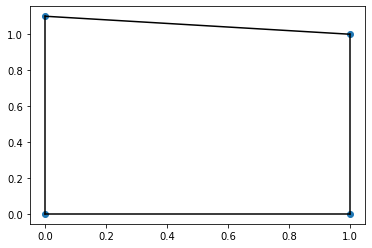

In [28]:
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

Диаграммы Вороного

In [29]:
from scipy.spatial import Voronoi, voronoi_plot_2d

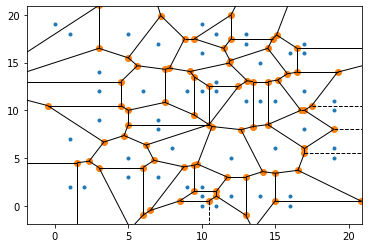

In [36]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

Матрицы расстояний

In [31]:
from scipy.spatial import distance_matrix

In [32]:
# Евклидово расстояние
distance_matrix([[0, 1]], [[1, 2]], p=2)

array([[1.41421356]])

In [33]:
# расстояние Минковского третьей степени между матрицами
distance_matrix([[0, 1], [0, 1]], [[1, 2], [0, 1]], p=3)

array([[1.25992105, 0.        ],
       [1.25992105, 0.        ]])

In [37]:
points_1 = [(0, 0), (28, 13), (21, 24), (5, 17), (13, 8)]
points_2 = [(2, 17), (6, 6), (8, 25), (13, 28), (19, 15)]
distance_matrix(points_1, points_2, p=5)

array([[17.00007663,  6.89219013, 25.01675474, 28.119784  , 20.04414717],
       [26.00044815, 22.01433058, 20.30179359, 17.23047532,  9.00097525],
       [19.02572349, 19.25814812, 13.000007  ,  8.04938647,  9.00097525],
       [ 3.        , 11.00001366,  8.01183019, 11.41508815, 14.00016659],
       [11.7091133 ,  7.00266353, 17.00747657, 20.        ,  7.55313029]])

Оптимизация без ограничений

In [38]:
from scipy.optimize import minimize

In [39]:
# зададим функцию, которую хотим минимизировать.
def function_to_minimize(x):
    return x[0]**3 + 4 * x[0]**2 + 10 + 30*x[1]**2

In [40]:
# Симплекс-метод
x0 = np.array([1, 3])
res = minimize(function_to_minimize, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 10.000000
         Iterations: 81
         Function evaluations: 155


In [41]:
# BFGS
res = minimize(function_to_minimize, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})

         Current function value: -645910098997.281128
         Iterations: 2
         Function evaluations: 351
         Gradient evaluations: 113


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_8736\1312777196.py:2: OptimizeWarning: Unknown solver options: xatol
  res = minimize(function_to_minimize, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})


Оптимизация с ограничениями

In [42]:
# пропишем граничные условия
from scipy.optimize import Bounds
bounds = Bounds ([-10, 0], [10, 100.0])

In [43]:
# Сформулируем вид линейного ограничения.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint ([[1, 1]], [42], [42])

In [44]:
# Опишем оптимизируемую функцию:
def func(x):
    return x[0]**3 - 5*x[1]**2 -5

In [45]:
# процесс оптимизации
res = minimize(func, x0, method='SLSQP', constraints=[linear_constraint],
            bounds=bounds)

In [46]:
res

     fun: -14525.000002729865
     jac: array([ 300., -520.])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-10.        ,  52.00000001])

In [47]:
def func_1(x):
    return x**5 - x**4 + x**3 - x**2

x0 = 0
res = minimize(func_1, x0, method="Powell", options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -0.220559
         Iterations: 2
         Function evaluations: 27


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_8736\3772345831.py:5: OptimizeWarning: Unknown solver options: xatol
  res = minimize(func_1, x0, method="Powell", options={'xatol': 1e-8, 'disp': True})


In [48]:
from math import sin, cos

In [50]:
def func_2(x):
    return -cos(x) + x**4 - x**3 + sin(x)

x0 = 0
res = minimize(func_2, x0, method="Powell", options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -1.224726
         Iterations: 2
         Function evaluations: 28


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_8736\2488650984.py:5: OptimizeWarning: Unknown solver options: xatol
  res = minimize(func_2, x0, method="Powell", options={'xatol': 1e-8, 'disp': True})


In [54]:
def func_3(x):
    return cos(x) - x**3 + x**2 - sin(x)

x0 = 0
bounds = Bounds([-2], [2])
res = minimize(func_3, x0, method="SLSQP", bounds=bounds, options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: -5.325444263372824
            Iterations: 3
            Function evaluations: 6
            Gradient evaluations: 3


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_8736\2125607181.py:6: OptimizeWarning: Unknown solver options: xatol
  res = minimize(func_3, x0, method="SLSQP", bounds=bounds, options={'xatol': 1e-8, 'disp': True})


Интерполяция

In [55]:
from scipy.interpolate import interp1d

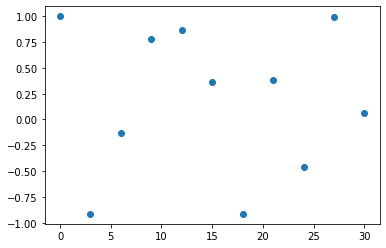

In [58]:
# Сгенерируем точки, соответствующие функции косинуса
x = np.linspace(0, 30, num=11, endpoint=True)
y = np.cos(-x**2)

plt.plot(x, y, 'o')

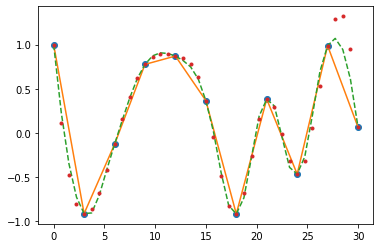

In [59]:
# Попробуем построить интерполяцию линейную, квадратичную и кубическую.
xnew = np.linspace(0, 30, num=41, endpoint=True)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.')
plt.show()